In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from scipy.stats import poisson
from scipy.optimize import curve_fit

from load_data import *

In [2]:
file = './data/MUO final filtered pulse data_overweekend.txt'
data = load_digitizer(file)
describe(data)

Number of events: 146310
Δt_us: min=1.0000, max=40.0320, mean=4.5010
Amp1: min=0.0700, max=0.6509
Amp2: min=-0.0111, max=0.6216
Width1: min=5.4038e-08, max=5.7642e-07
Width2: min=5.5654e-09, max=7.5744e-07


95th percentile A1 cut = 0.4699
95th percentile A2 cut = 0.0909


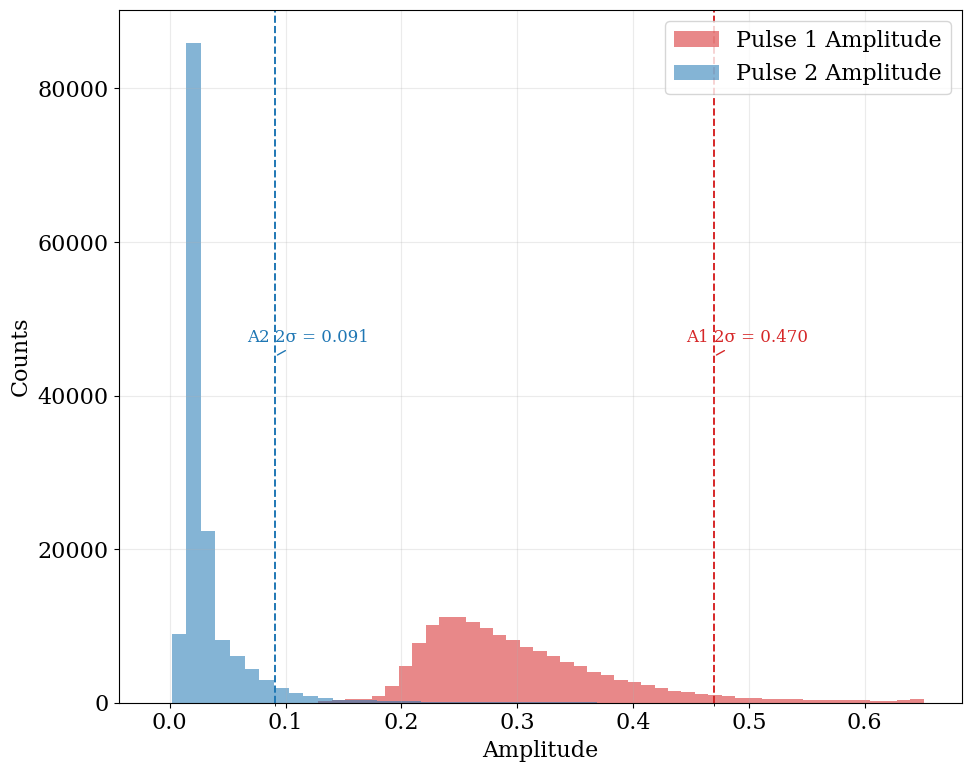

In [8]:

# Lifetime (if needed)
lifetime = data["t2"] - data["t1"]

# Compute 95th percentile cuts
A1_cut_95 = np.percentile(data["A1"], 95)
A2_cut_95 = np.percentile(data["A2"], 95)

print(f"95th percentile A1 cut = {A1_cut_95:.4f}")
print(f"95th percentile A2 cut = {A2_cut_95:.4f}")

# Global serif style
plt.rcParams.update({
    "font.family": "serif",
    "font.size": 16,
})

fig, ax = plt.subplots(figsize=(10, 8))

# Histograms
ax.hist(
    data["A1"], bins=50, histtype="stepfilled",
    alpha=0.55, label="Pulse 1 Amplitude", color="tab:red"
)
ax.hist(
    data["A2"], bins=50, histtype="stepfilled",
    alpha=0.55, label="Pulse 2 Amplitude", color="tab:blue"
)

# Vertical cut lines
ax.axvline(A1_cut_95, color="tab:red", linestyle="--", linewidth=1.4)
ax.axvline(A2_cut_95, color="tab:blue", linestyle="--", linewidth=1.4)

# Minor ticks for cut positions (no overlap with major ticks)
ax.set_xticks([A1_cut_95, A2_cut_95], minor=True)

# Annotate cuts without cluttering the legend or x-axis
ax.annotate(
    f"A1 2σ = {A1_cut_95:.3f}",
    xy=(A1_cut_95, ax.get_ylim()[1]*0.5),
    xytext=(-20, 10), textcoords="offset points",
    color="tab:red", fontsize=12,
    arrowprops=dict(arrowstyle="-", color="tab:red")
)
ax.annotate(
    f"A2 2σ = {A2_cut_95:.3f}",
    xy=(A2_cut_95, ax.get_ylim()[1]*0.5),
    xytext=(-20, 10), textcoords="offset points",
    color="tab:blue", fontsize=12,
    arrowprops=dict(arrowstyle="-", color="tab:blue")
)

# Labels, grid, legend
ax.set_xlabel("Amplitude")
ax.set_ylabel("Counts")
ax.grid(alpha=0.25)

ax.legend(loc="upper right")

fig.tight_layout()
fig.savefig("./figures/amplitude_cut.pdf",
            bbox_inches="tight", pad_inches=0.05)
plt.show()


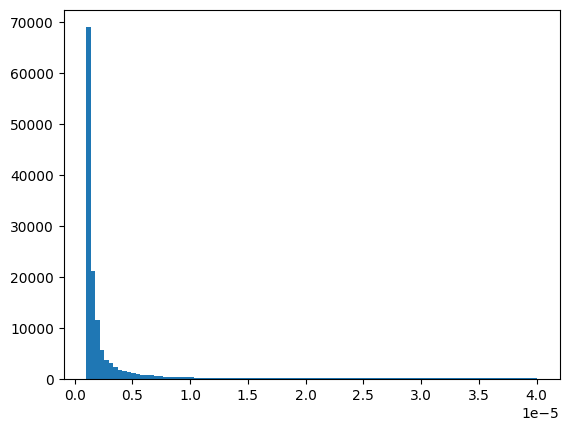

In [9]:
plt.hist(lifetime, bins=100)
plt.show()

In [4]:
lifetime = data["Ch0_time2 (s)"] - data["Ch0_time1 (s)"]

hist, bin_edges = np.histogram(lifetime, bins=50)
bin_centers = (bin_edges[:-1] + bin_edges[1:]) / 2
hist = hist[0:]
bin_centers = bin_centers[0:]

def exp_decay(t, A, tau, C):
    return A * np.exp(-t / tau) + C

p0 = [np.max(hist), np.mean(lifetime), 0]
params, cov = curve_fit(exp_decay, bin_centers, hist, p0=p0)
A_fit, tau_fit, C_fit = params

A_err, tau_err, C_err = np.sqrt(np.diag(cov))
print(f"Fitted mean lifetime tau = {tau_fit:.3e} ± {tau_err:.3e} s")

Fitted mean lifetime tau = 4.878e-07 ± 1.242e-08 s


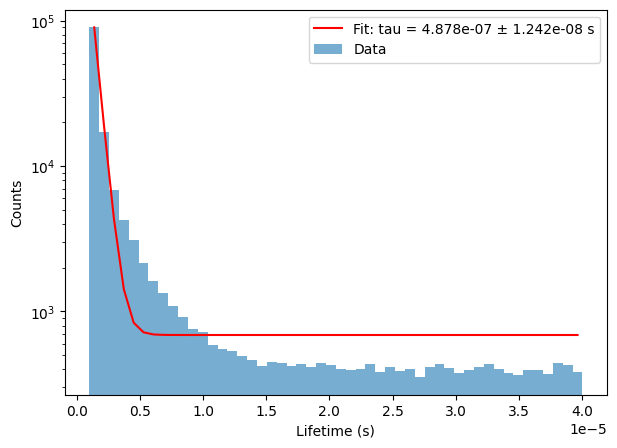

In [5]:
plt.figure(figsize=(7,5))
plt.bar(bin_centers, hist, width=(bin_edges[1]-bin_edges[0]), alpha=0.6, label='Data')
plt.plot(bin_centers, exp_decay(bin_centers, A_fit, tau_fit, C_fit), 'r-', label=f'Fit: tau = {tau_fit:.3e} ± {tau_err:.3e} s')
plt.yscale("log")
plt.xlabel("Lifetime (s)")
plt.ylabel("Counts")
plt.legend()
plt.show()

In [ ]:
#| echo: false
#| output: false
filename = "eda.ipynb"

!html2pdf "$filename"